In [60]:
import pandas as pd
decessi_covid = pd.read_csv('csv/decessi_covid19_30giugno.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [61]:
decessi_covid = decessi_covid[decessi_covid['data'] > '2020-02-29']

In [62]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-03-01,5.0
2020-03-02,18.0
2020-03-03,27.0
2020-03-04,28.0
2020-03-05,41.0


In [63]:
decessi_covid = decessi_covid.groupby(pd.Grouper(freq='M')).sum()
decessi_covid.head(10)

,deceduti
data,
2020-03-31,12399.0
2020-04-30,15539.0
2020-05-31,5448.0
2020-06-30,1352.0


In [64]:
ts_decessi_covid = decessi_covid.deceduti

<h3> CREO SERIE STORICA DEI DECESSI TOTALI (fonte ISTAT) </h3>

In [65]:
df = pd.read_csv('csv/serie_storica.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2508
1,2015-01-02,2079
2,2015-01-03,2107
3,2015-01-04,2135
4,2015-01-05,2199


In [66]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.TOTALE = pd.to_numeric(df.TOTALE)

In [67]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-29']
df_covid_period.head()

,DATA,TOTALE
1886,2020-03-01,1838
1887,2020-03-02,1948
1888,2020-03-03,1959
1889,2020-03-04,1823
1890,2020-03-05,1997


In [68]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-03-01,1838
2020-03-02,1948
2020-03-03,1959
2020-03-04,1823
2020-03-05,1997


In [69]:
df_covid_period = df_covid_period.groupby(pd.Grouper(freq='M')).sum()
df_covid_period.head(10)

,TOTALE
DATA,
2020-03-31,82867
2020-04-30,67805
2020-05-31,48326
2020-06-30,43247


In [70]:
ts_covid_period = df_covid_period.TOTALE

<h3> CREO SERIE STORICA DELLE PREDIZIONI </h3>

In [71]:
predictions = pd.read_csv('csv/predictions_SARIMA_7352comuni.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,63323.839318
2,2015-03-31,57750.837865
3,2015-04-30,53269.209918
4,2015-05-31,48857.560687


In [72]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,63323.839318
2,2015-03-31,57750.837865
3,2015-04-30,53269.209918
4,2015-05-31,48857.560687


In [73]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-29']
predictions_covid_period.head()

,Data,Totale
62,2020-03-31,56534.933750
63,2020-04-30,50129.783354
64,2020-05-31,48220.554311
65,2020-06-30,48927.148330


In [74]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-03-31,56534.933750
2020-04-30,50129.783354
2020-05-31,48220.554311
2020-06-30,48927.148330


In [75]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h2> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/04/2020 
    <br />
    (periodo in cui sono stati registrati i decessi COVID-19) </h2>

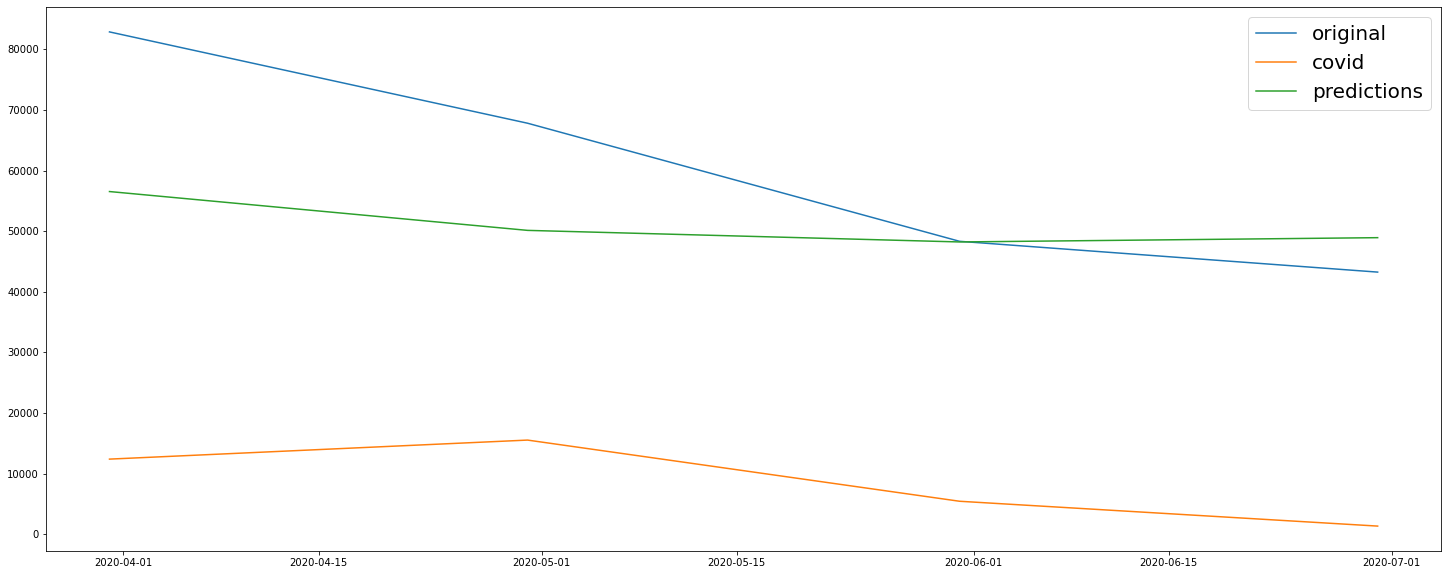

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))

plt.plot(ts_covid_period, label='original')
plt.plot(ts_decessi_covid, label='covid')
plt.plot(ts_predictions_covid_period, label='predictions')

plt.legend(prop={'size': 20})
plt.show()

In [77]:
ts_covid_period

DATA
2020-03-31    82867
2020-04-30    67805
2020-05-31    48326
2020-06-30    43247
Freq: M, Name: TOTALE, dtype: int64

In [78]:
ts_decessi_covid

data
2020-03-31    12399.0
2020-04-30    15539.0
2020-05-31     5448.0
2020-06-30     1352.0
Freq: M, Name: deceduti, dtype: float64

In [79]:
ts_predictions_covid_period

Data
2020-03-31    56534.933750
2020-04-30    50129.783354
2020-05-31    48220.554311
2020-06-30    48927.148330
Name: Totale, dtype: float64

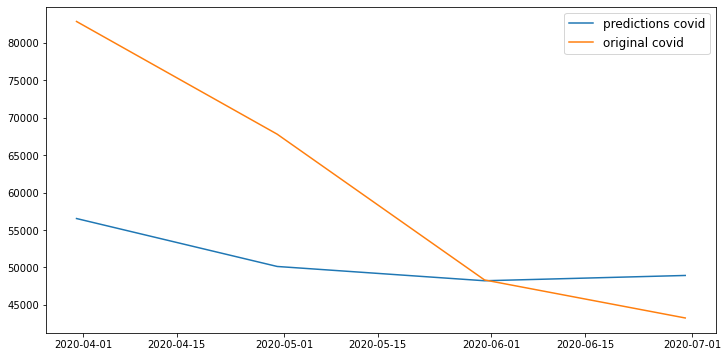

In [83]:
plt.figure(figsize=(12,6))

plt.plot(ts_predictions_covid_period, label='predictions covid')
plt.plot(ts_covid_period, label='original covid')
plt.legend(prop={'size': 12})
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

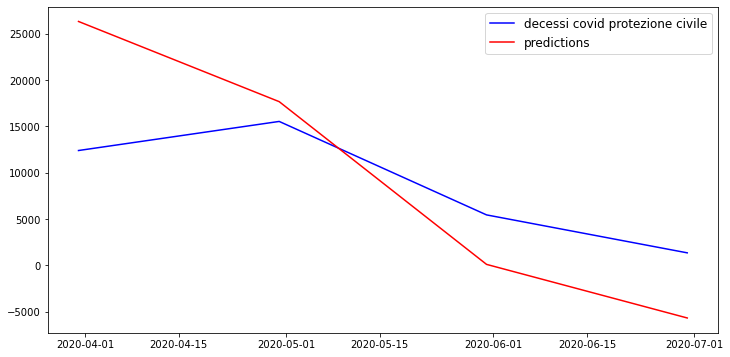

In [84]:
n = ts_covid_period - ts_predictions_covid_period 

plt.figure(figsize=(12,6))
plt.plot(ts_decessi_covid, color='blue', label='decessi covid protezione civile')
plt.plot(n, color='red', label='predictions')
plt.legend(prop={'size': 12})
plt.show()

In [85]:
total = n.sum()
print(int(total))

38432


<h5> Tolgo dal totale dei decessi registrati dall'ISTAT la predizione del modello e i decessi covid registrati dalla protezione civile </h5>

In [86]:
# numero di decessi non registrati
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

3694
